In [ ]:
!pip install numpy


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

Reading the Dataset

In [4]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [7]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


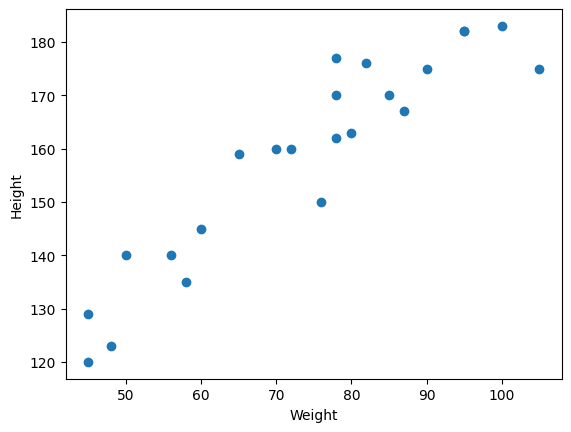

In [ ]:
##Visualizing the Data

plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [10]:
!pip install scikit-learn


     ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
     - -------------------------------------- 0.3/8.9 MB 6.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.9/8.9 MB 9.2 MB/s eta 0:00:01
     ----- ---------------------------------- 1.2/8.9 MB 8.7 MB/s eta 0:00:01
     ------- -------------------------------- 1.6/8.9 MB 8.6 MB/s eta 0:00:01
     --------- ------------------------------ 2.0/8.9 MB 8.5 MB/s eta 0:00:01
     ---------- ----------------------------- 2.4/8.9 MB 8.5 MB/s eta 0:00:01
     ------------ --------------------------- 2.8/8.9 MB 8.5 MB/s eta 0:00:01
     -------------- ------------------------- 3.2/8.9 MB 8.5 MB/s eta 0:00:01
     ---------------- ----------------------- 3.6/8.9 MB 8.4 MB/s eta 0:00:01
     ----------------- ---------------------- 4.0/8.9 MB 8.4 MB/s eta 0:00:01
     ------------------- -------------------- 4.3/8.9 MB 8.4 MB/s eta 0:00:01
     --------------------- ------------------ 4.7/8.9 MB 8.4 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\varsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import sys
!{sys.executable} -m pip install scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\varsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
##Dividing Features into Independent and Dependent

X = df[['Weight']]
y = df['Height']

In [14]:
##Performing Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
##Standardizing the Data

from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

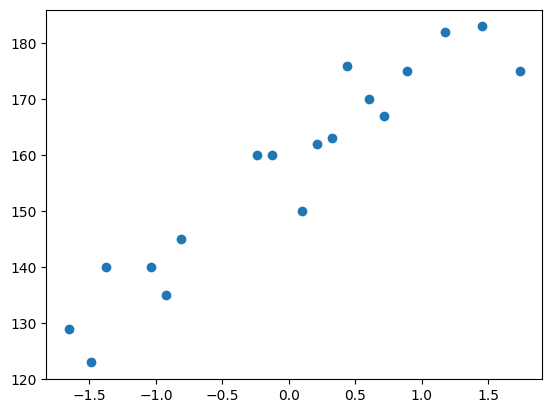

In [17]:
##Visualizing Standardized Data
plt.scatter(X_train, y_train)
plt.show()

In [18]:
##raining the Simple Linear Regression Model

from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
##Model Parameters

print('Coefficient (Slope):', regressor.coef_[0])
print('Intercept:', regressor.intercept_)

Coefficient (Slope): 17.034408719095538
Intercept: 157.5


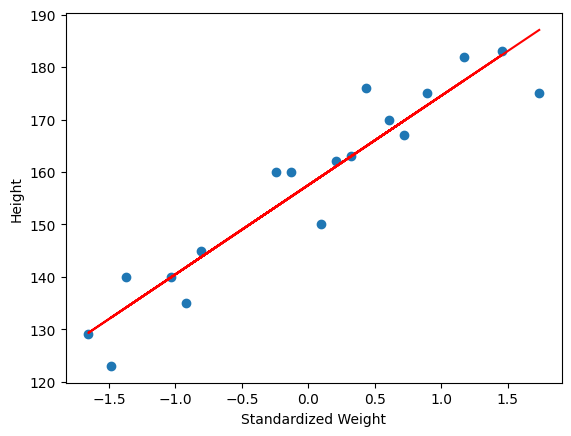

In [21]:
##Plotting the Best Fit Line

plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel('Standardized Weight')
plt.ylabel('Height')
plt.show()

In [22]:
##Making Predictions on Test Data

y_pred_test = regressor.predict(X_test)

In [23]:
##Comparing Actual and Predicted Values

print('Actual:', y_test.values)
print('Predicted:', y_pred_test)

Actual: [177 170 120 182 159]
Predicted: [161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


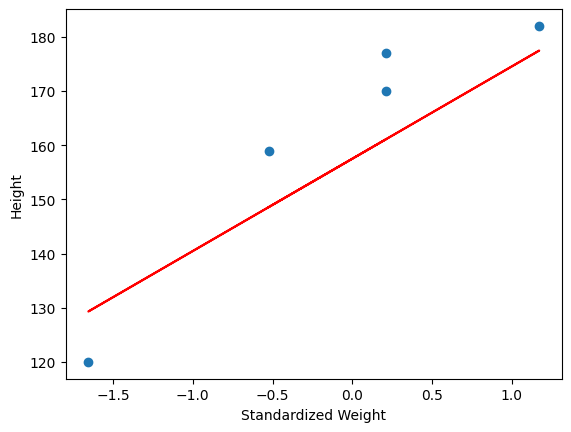

In [24]:
##Visualizing Predictions

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color='red')
plt.xlabel('Standardized Weight')
plt.ylabel('Height')
plt.show()

In [25]:
##Performance Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [26]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R squared:', r2)

Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
Root Mean Squared Error: 10.477400726827081
R squared: 0.776986986042344


In [27]:
##Calculating Adjusted R squared

n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print('Adjusted R squared:', adjusted_r2)

Adjusted R squared: 0.7026493147231252


In [28]:
##Predicting Height for a New Weight Value

new_weight = np.array([[80]])  # Weight in kg
scaled_weight = scaler.transform(new_weight)
predicted_height = regressor.predict(scaled_weight)
print(f'Predicted height for weight 80kg: {predicted_height[0]:.2f}')

Predicted height for weight 80kg: 163.01


C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
##Plotting Actual vs Predicted Values



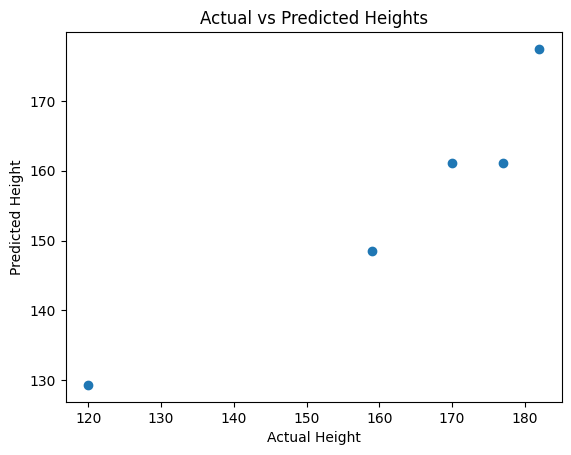

In [29]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual vs Predicted Heights')
plt.show()

In [30]:
!pip install seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ------------------------------------ - 286.7/294.9 kB 5.9 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\varsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


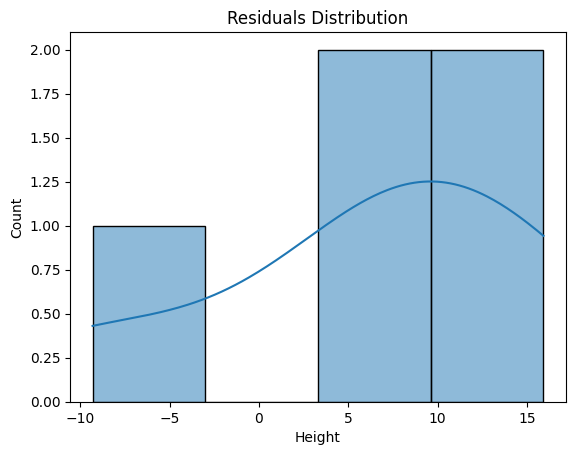

In [31]:
##Calculating and Plotting Residuals

import seaborn as sns

residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

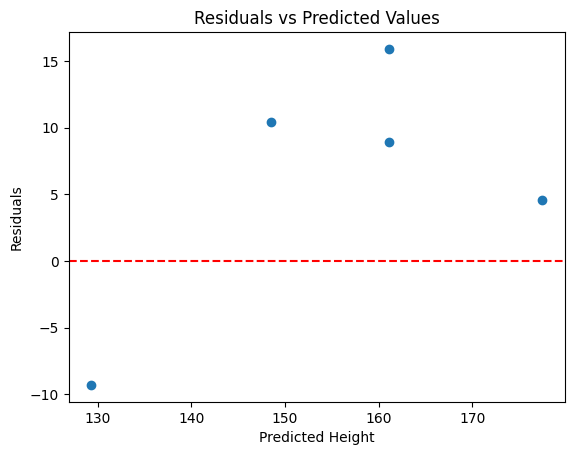

In [32]:
##Plotting Residuals vs Predicted Values

plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Height')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()